<a href="https://colab.research.google.com/github/practice404/deep-learning/blob/master/linear_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [320]:
data = pd.read_csv('data.csv', names=['X','Y','Label'])
data.head()

,X,Y,Label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [321]:
def perceptron_algo(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
      t = ((X[i] @ W) + b)[0] # solving linear equation
      if t >= 0:
        pred = 1
      else:
        pred = 0
      if y[i] == 1 and pred == 0:
          for n in range(len(W)):
              W[n] += X[i][n]*learn_rate
          b += learn_rate
      if y[i] == 0 and pred == 1:
        for n in range(len(W)):
            W[n] -= X[i][n]*learn_rate 
        b -= learn_rate
    
    return W, b

In [322]:
def begin(X,label, rounds=50):
  x_min, x_max = X.T[0].min(), X.T[0].max()
  y_min, y_max = X.T[1].min(), X.T[1].max()
  W = np.random.rand(2,1)
  b = np.random.rand(1)[0] + x_max

  boundary_lines = []
  for _ in range(rounds):
    W,b = perceptron_algo(X,label, W, b)
    boundary_lines.append((-W[0]/W[1], -b/W[1]))
  return boundary_lines

In [323]:
def plot_graph(line_data):
  x_0 = data[data['Label'] == 0][['X','Y']].values
  x_1 = data[data['Label'] == 1][['X','Y']].values

  plt.figure(figsize=(10,6))
  plt.scatter(x = x_0.T[0], y=x_0.T[1],c="red")
  plt.scatter(x = x_1.T[0], y=x_1.T[1],c="blue")
  for i in range(len(line_data)):
    if i == len(line_data) - 1:
      color = 'black'
    else:
      color = 'green'
    slope,intercept = line_data[i]
    axes = plt.gca()
    axes.set_ylim([y_min,y_max])
    x_vals = np.random.rand(25)
    y_vals = intercept[0] + slope[0] * x_vals
    plt.plot(x_vals, y_vals,c=color)

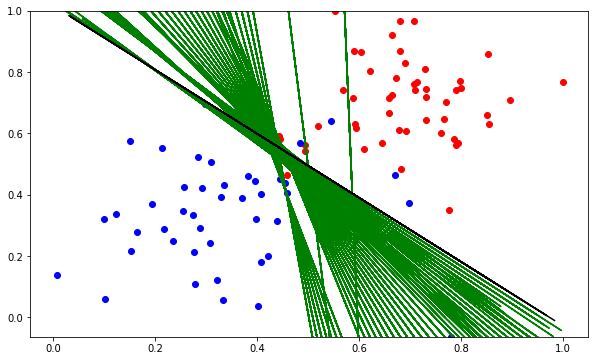

In [324]:
X = data[['X','Y']].values
label = data['Label'].values

line_data = begin(X,label)

plot_graph(line_data)